In [23]:
import feyn
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA = 'data/'

In [43]:
df = pd.read_csv(DATA + 'churn.csv', sep=',', encoding='utf-8')
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

# Auto EDA

In [4]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='eda_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
prof.to_notebook_iframe()

# Manual EDA

## Missing values

In [52]:
df['gender'].replace('Unknown', np.nan, inplace=True)
df['joined_through_referral'].replace('?', np.nan, inplace=True)
df['referral_id'].replace('xxxxxxxx', np.nan, inplace=True)
df['medium_of_operation'].replace('?', np.nan, inplace=True)
# What does this mean actually?
df['avg_frequency_login_days'].replace('Error', np.nan, inplace=True)

## Percentage

In [53]:
df.isna().sum() * 100 / len(df)

id                               0.000000
age                              0.000000
gender                           0.159494
security_no                      0.000000
region_category                 14.673443
membership_category              0.000000
joining_date                     0.000000
joined_through_referral         14.700476
referral_id                     48.242863
preferred_offer_types            0.778547
medium_of_operation             14.578828
internet_option                  0.000000
last_visit_time                  0.000000
days_since_last_login            0.000000
avg_time_spent                   0.000000
avg_transaction_value            0.000000
avg_frequency_login_days         9.520978
points_in_wallet                 9.307418
used_special_discount            0.000000
offer_application_preference     0.000000
past_complaint                   0.000000
complaint_status                 0.000000
feedback                         0.000000
churn_risk_score                 0

In [14]:
df.describe(percentiles=[0.05, 0.25, 0.50, 0.75, 0.95]).T

count          mean           std          min  \
id                     36992.0  18495.500000  10678.814916     0.000000   
age                    36992.0     37.118161     15.867412    10.000000   
days_since_last_login  36992.0    -41.915576    228.819900  -999.000000   
avg_time_spent         36992.0    243.472334    398.289149 -2814.109110   
avg_transaction_value  36992.0  29271.194003  19444.806226   800.460000   
points_in_wallet       33549.0    686.882199    194.063624  -760.661236   
churn_risk_score       36992.0      0.540982      0.498324     0.000000   

                                5%         25%        50%        75%  \
id                     1849.550000   9247.7500  18495.500  27743.250   
age                      12.000000     23.0000     37.000     51.000   
days_since_last_login  -999.000000      8.0000     12.000     16.000   
avg_time_spent           30.150000     60.1025    161.765    356.515   
avg_transaction_value  3468.966500  14177.5400  27554.485  40855.110   
points_in_wallet        330.752231    616.1500    697.620    763.950   
churn_risk_score          0.000000      0.0000      1.000      1.000   

                                95%           max  
id                     35141.450000  36991.000000  
age                       62.000000     64.000000  
days_since_last_login     22.000000     26.000000  
avg_time_spent          1031.076748   3235.578521  
avg_transaction_value  67338.889500  99914.050000  
points_in_wallet        1046.603480   2069.069761  
churn_risk_score           1.000000      1.000000

In [15]:
## Hay que hacer un par de plots

## Pearson's correlation

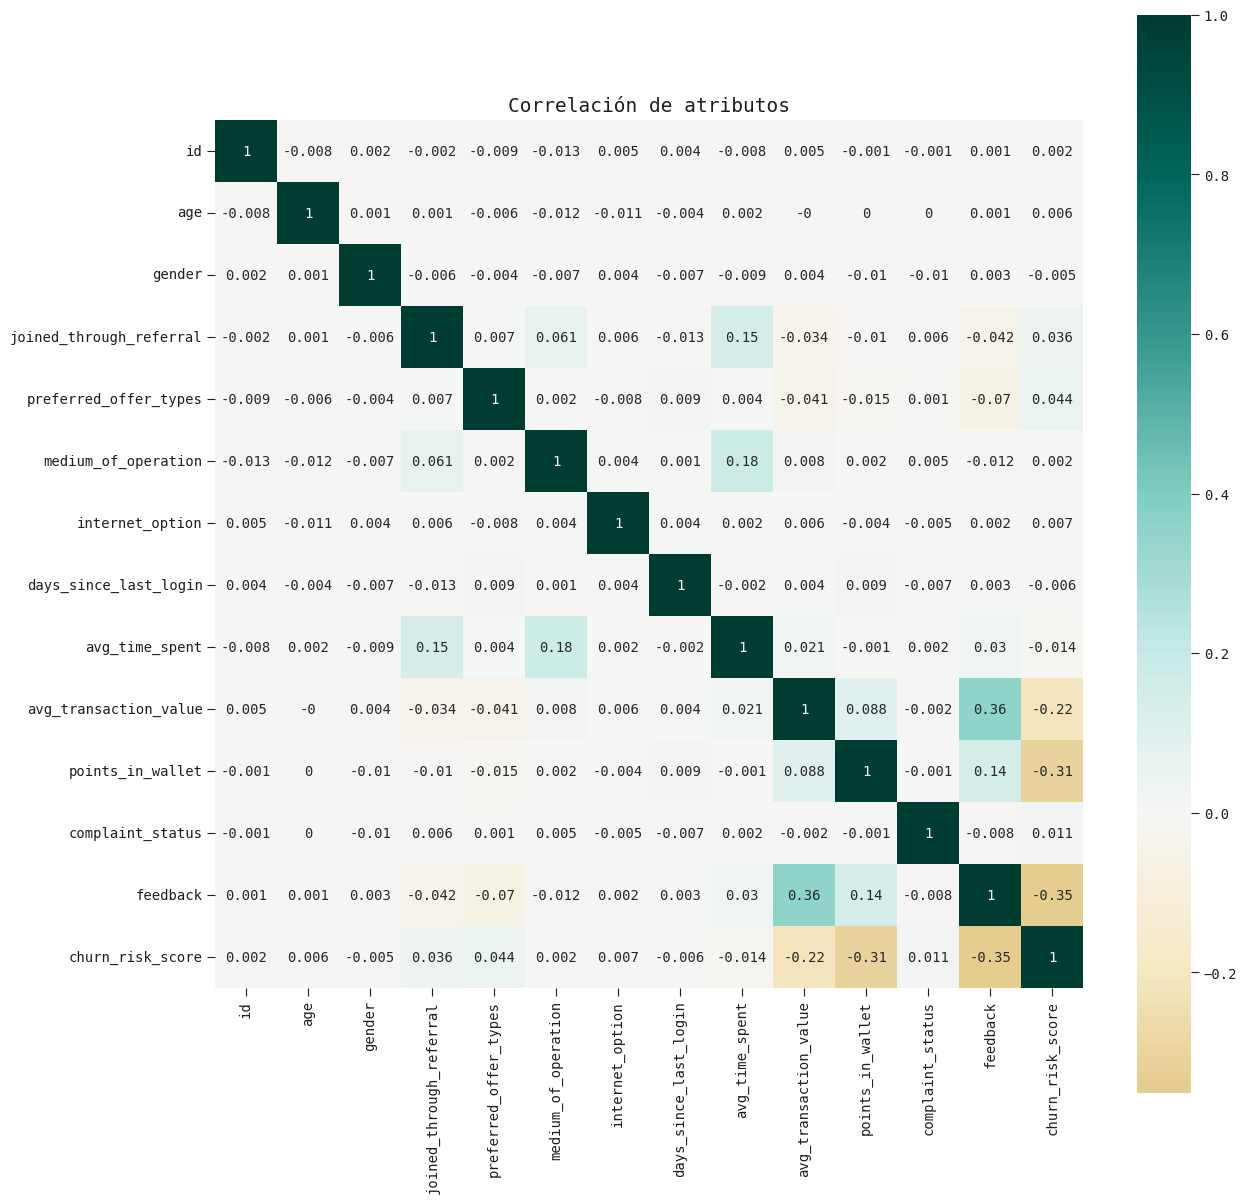

In [29]:
def generate_map_from_keys(keys):
    return {k: i for i, k in enumerate(keys)}

corr_df = df.copy()
corr_df['gender'].replace(generate_map_from_keys(['F','M']), inplace = True)
corr_df['region_category'].replace(generate_map_from_keys(['City','Town']), inplace = True)
corr_df['membership_category'].replace(
    generate_map_from_keys(
        ['Basic Membership','No Membership', 'Gold Membership', 'Silver Membership','Premium Membership']
    ), 
    inplace = True
)
corr_df['joined_through_referral'].replace(generate_map_from_keys(['No','Yes']), inplace = True)
corr_df['preferred_offer_types'].replace(
    generate_map_from_keys(
        ['Gift Vouchers/Coupons','Credit/Debit Card Offers', 'Without Offers']
    ),
    inplace = True
)
corr_df['medium_of_operation'].replace(
    generate_map_from_keys(
        ['Desktop','Smartphone', 'Both']
    ),
    inplace = True
)
corr_df['internet_option'].replace(
    generate_map_from_keys(
        ['Wi-Fi','Mobile_Data', 'Fiber_Optic']
    ),
    inplace = True
)
corr_df['joined_through_referral'].replace(generate_map_from_keys(['No','Yes']), inplace = True)
corr_df['joined_through_referral'].replace(generate_map_from_keys(['No','Yes']), inplace = True)
corr_df['joined_through_referral'].replace(generate_map_from_keys(['No','Yes']), inplace = True)
corr_df['complaint_status'].replace(
    generate_map_from_keys(
        ['Not Applicable', 'Unsolved', 'Solved', 'Solved in Follow-up','No Information Available']
    ), 
    inplace = True
)
corr_df['feedback'].replace(
    generate_map_from_keys(
        ['Poor Product Quality', 'No reason specified', 'Too many ads', 'Poor Website', 
         'Poor Customer Service', 'Reasonable Price', 'User Friendly Website', 'Products always in Stock',
         'Quality Customer Care']
    ), 
    inplace = True
)

plt.subplots(figsize=(14, 14))
sns_plot = sns.heatmap(corr_df.corr(method = 'pearson').round(decimals = 3), annot = True, cmap="BrBG", center = 0.0, square = True)
sns_plot.set_title('Correlación de atributos')
sns_plot.get_figure().savefig("correlacion_pearson.png")

La matriz de correlación de Pearson sugiere que hay más correlación entre el riesgo de abandono del cliente y los campos
    - feedback
    - points_in_wallet
    - avg_transaction_value
    
Asimismo, el campo feedback tiene una correlación relativa con el valor promedio de transacciones (avg_ transaction_value) y con el campo points_in_wallet.

Por último, el campo avg_time_spent tiene cierta correlación con los campos joined_through_referral y medium_of_operation

<AxesSubplot:title={'center':'Correlación de atributos con tasa de abandono del cliente'}>

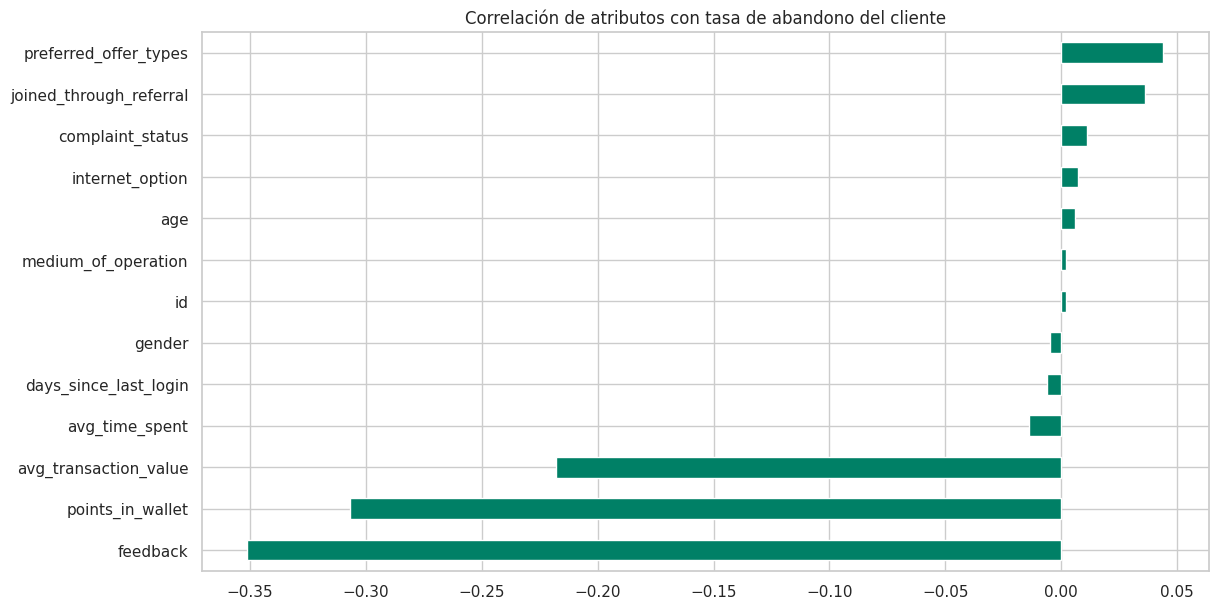

In [31]:
sns.set(rc={'figure.figsize':(13, 7)}, style = "whitegrid")
corr_df.corr(method = 'pearson')['churn_risk_score'].drop(['churn_risk_score']).round(decimals = 3).sort_values().plot(kind = 'barh', grid = True, colormap = 'summer', title = 'Correlación de atributos con la tasa de abandono del cliente')

## Data Cleaning

### gender

Hay un 0,15% de valores nulos. Vamos a completarlos usando la moda

In [55]:
df['gender'].fillna(df['gender'].mode()[0], inplace = True)
df['gender'].value_counts()

F    18549
M    18443
Name: gender, dtype: int64

### security_no

Se trata de un id único, así que vamos a prescindir de él

In [55]:
df.drop(columns=['security_no'], inplace=True)

F    18549
M    18443
Name: gender, dtype: int64

### region_category

Tiene alrededor de un 15% de atributos faltantes, así que vamos a generar una nueva categoría "Unknown" porque podemos llegar a ensuciar la estructura de los datos si elegimos completar por la moda

In [56]:
df['region_category'].fillna('Unknown', inplace = True)
df['region_category'].value_counts()

Town       14128
City       12737
Unknown     5428
Village     4699
Name: region_category, dtype: int64

### joined_through_referral

Análogamente, vamos a completar usando una nueva categoría Unknown porque tenemos un 15% de atributos faltantes.

In [57]:
df['joined_through_referral'].fillna('Unknown', inplace = True)
df['joined_through_referral'].value_counts()

No         15839
Yes        15715
Unknown     5438
Name: joined_through_referral, dtype: int64

### referral_id

No nos interesa el dato y está excedido de valores desconocidos. Prescindiremos del atributo

In [58]:
df.drop(columns=['referral_id'], inplace=True)

### preferred_offer_types

Hay un 0,8% de valores nulos. Vamos a completarlos usando la moda

In [59]:
df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0], inplace = True)
df['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

### medium_of_operation

Una vez más vamos a completar usando una nueva categoría Unknown porque tenemos casi un 15% de atributos faltantes.

In [62]:
df['medium_of_operation'].fillna('Unknown', inplace = True)
df['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
Unknown        5393
Both           3810
Name: medium_of_operation, dtype: int64

## Feature engineering

### age

Vamos a generar 4 rangos para el atributo edad

In [44]:
df['age'] = pd.cut(df['age'], 4, labels=[str(i) for i in range(0, 4)])
df['age'].value_counts()

3    9488
1    9410
0    9322
2    8772
Name: age, dtype: int64

## Dataset split

In [23]:
# For the first execution we will create them and comment this
# train, test = feyn.tools.split(df, ratio=(10,1), random_state=101)
# train.to_csv(DATA + 'train_churn.csv', sep=',', encoding='utf-8', index=False)
# test.to_csv(DATA + 'test_churn.csv', sep=',', encoding='utf-8', index=False)

In [24]:
# Now we just read them
del df
train = pd.read_csv(DATA + 'train_churn.csv', sep=',', encoding='utf-8')
test = pd.read_csv(DATA + 'test_churn.csv', sep=',', encoding='utf-8')
print(f"Dataset de entrenamiento tiene un shape de {train.shape}")
print(f"Dataset de prueba tiene un shape de {test.shape}")

Dataset de entrenamiento tiene un shape de (33630, 24)
Dataset de prueba tiene un shape de (3362, 24)
